In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
root_dir = os.path.abspath('../../')
sys.path.append(root_dir)
# sys.path.append(os.path.join(root_dir,'../DPMJET-III-gitlab/lib'))
print(root_dir)

pythia_dir = os.path.join(
    os.path.expanduser('~'), 'devel', 'apps', 'pythia8240')
sys.path.append(os.path.join(pythia_dir, 'lib'))

from impy.definitions import *
from impy.constants import *
from impy.kinematics import EventKinematics
from impy import impy_config, pdata

/mnt/e/Main/job/github/repo/impy


In [17]:
print(sys.path)

['/mnt/e/Main/job/github/repo/impy/impy/tests', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/mnt/e/Main/job/github/repo/impy_venv_01/lib/python3.8/site-packages', '/mnt/e/Main/job/github/repo/impy', '/mnt/e/Main/job/github/repo/impy', '/home/anton/devel/apps/pythia8240/lib', '/mnt/e/Main/job/github/repo/impy/impy/lib']


In [3]:
# AF: This is what the user interaction has to yield.
# It is the typical expected configuration that one
# wants to run (read pp-mode at energies not exceeding
# 7 TeV). If you want cosmic ray energies, this should
# be rather p-N at 10 EeV and lab frame (not yet defined).

event_kinematics = EventKinematics(
    ecm= 14000 * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc2_prop=(12,6)
)

In [4]:
impy_config["user_frame"] = 'center-of-mass'
impy_config['tau_stable'] = 10e-12
impy_config['pi0_stable'] = True
impy_config['debug_level'] = 2

In [5]:
generator = make_generator_instance(interaction_model_by_tag['DPMJETIII191'])
generator.init_generator(event_kinematics)
# import IPython
# IPython.embed()
sibyll = make_generator_instance(interaction_model_by_tag['SIBYLL23D'])
sibyll.init_generator(event_kinematics)


impy.models.dpmjetIII.DpmjetIIIRun::init_generator(): Initializing DPMJET-III
 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.1.0                       |
 |                                                                       |
 |                      (Last change:  09 Jul 2019)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch  (ICRR)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        https://gith

In [6]:
n_bins = 30
bins = np.linspace(-1,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
urq_pions = np.zeros(n_bins)
urq_protons = np.zeros(n_bins)
eta_bins = np.linspace(-7,7,n_bins+1)
eta_grid = 0.5*(eta_bins[1:] + eta_bins[:-1])
wdths_eta = (eta_bins[1:] - eta_bins[:-1])
urq_charged_eta = np.zeros(n_bins)

n_events = 10000
norm = 1./float(n_events)

# This
for event in generator.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    urq_protons += norm*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    urq_pions += norm*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    urq_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

 DT_INITJS: JETSET-parameter for PHOJET
 DT_JSPARA: new value (default value)
            PARJ(  1):  0.080 ( 0.100)
            PARJ(  2):  0.160 ( 0.300)
            PARJ(  3):  0.900 ( 0.400)
            MSTU(  4):   4000 ( 12000)
            PARJ(  5):  0.200 ( 0.500)
            PARJ(  7):  0.850 ( 0.500)
            MSTJ( 12):      3 (     2)
            PARJ( 18):  0.100 ( 1.000)
            MSTU( 20):      1 (     0)
            MSTJ( 21):      1 (     2)
            PARJ( 21):  0.420 ( 0.360)
            MSTU( 22):  50000 (    10)
            MSTJ( 22):      2 (     1)
            PARJ( 42):  0.850 ( 0.580)
            PARJ( 71):  2.998 (10.000)
            PARU(108):  0.008 ( 0.000)
1                                                                              
 ******************************************************************************
 ******************************************************************************
 **                                                       

In [28]:
print(bins)
print(np.linspace(-7,7,n_bins+1))


[0.         0.03333333 0.06666667 0.1        0.13333333 0.16666667
 0.2        0.23333333 0.26666667 0.3        0.33333333 0.36666667
 0.4        0.43333333 0.46666667 0.5        0.53333333 0.56666667
 0.6        0.63333333 0.66666667 0.7        0.73333333 0.76666667
 0.8        0.83333333 0.86666667 0.9        0.93333333 0.96666667
 1.        ]
[-7.         -6.53333333 -6.06666667 -5.6        -5.13333333 -4.66666667
 -4.2        -3.73333333 -3.26666667 -2.8        -2.33333333 -1.86666667
 -1.4        -0.93333333 -0.46666667  0.          0.46666667  0.93333333
  1.4         1.86666667  2.33333333  2.8         3.26666667  3.73333333
  4.2         4.66666667  5.13333333  5.6         6.06666667  6.53333333
  7.        ]


In [7]:
sib_pions = np.zeros(n_bins)
sib_protons = np.zeros(n_bins)
sib_charged_eta = np.zeros(n_bins)
# This
for event in sibyll.event_generator(event_kinematics, n_events):
    event.filter_final_state_charged()
    sib_protons += norm*np.histogram(event.xf[event.p_ids == 2212],bins=bins)[0]
    sib_pions += norm*np.histogram(event.xf[np.abs(event.p_ids) == 211],bins=bins)[0]
    sib_charged_eta += norm*np.histogram(event.eta,bins=eta_bins)[0]

[]

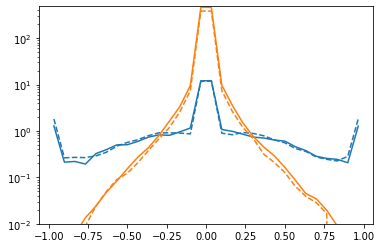

In [8]:
l=plt.plot(grid, urq_protons/widths)[0]
plt.plot(grid, sib_protons/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
l=plt.plot(grid, urq_pions/widths)[0]
plt.plot(grid, sib_pions/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(1e-2,)
plt.semilogy()

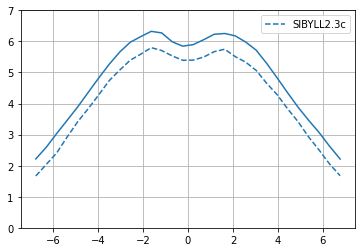

In [9]:
l=plt.plot(eta_grid, urq_charged_eta/wdths_eta)[0]
plt.plot(eta_grid, sib_charged_eta/wdths_eta,c=l.get_color(), ls='--',label='SIBYLL2.3c')
plt.ylim(0,7)
plt.grid()
plt.legend()
# plt.semilogy()

In [10]:
event_kinematics = EventKinematics(
    plab=1000. * GeV,
    p1pdg=2212,
    p2pdg=2212
#     nuc1_prop=(4,2),
#     nuc2_prop=(12,6)
)

In [11]:
# event_kinematics = EventKinematics(
#     plab=1000. * GeV,
# #     p1pdg=2212,
# #     p2pdg=2212
#     nuc1_prop=(4,2),
#     nuc2_prop=(12,6)
# )
n_bins = 30
# bins = np.linspace(-1,1.,n_bins+1)
bins = np.logspace(-1,1,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
urq_pions = np.zeros(n_bins)
urq_protons = np.zeros(n_bins)

n_events = 1000
norm = 1./float(n_events)

for event in generator.event_generator(event_kinematics, n_events):
#     event.filter_final_state_charged()
    event.filter_final_state_charged()
    urq_protons += norm*np.histogram(event.en[event.p_ids == 2212],bins=bins)[0]
    urq_pions += norm*np.histogram(event.en[np.abs(event.p_ids) == 211],bins=bins)[0]


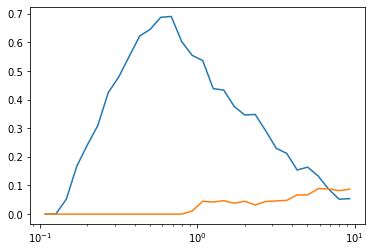

In [12]:
plt.semilogx(grid, urq_pions)
plt.plot(grid, urq_protons)

In [13]:
_ = [generator.set_stable(p) for p in [421,-421,411,-411]]
_ = [sibyll.set_stable(p) for p in [421,-421,411,-411]]

In [14]:
n_bins = 30
bins = np.linspace(0,1.,n_bins+1)
grid = 0.5*(bins[1:] + bins[:-1])
widths = (bins[1:] - bins[:-1])
dpm_dpm = np.zeros(n_bins)
d0_dpm = np.zeros(n_bins)
dpm_sib = np.zeros(n_bins)
d0_sib = np.zeros(n_bins)
n_events = 200000
norm = 1./float(n_events)

# This
for event in generator.event_generator(event_kinematics, n_events):
    event.filter_final_state()
    d0_dpm += norm*np.histogram(np.abs(event.xf[(event.p_ids == 421) | (event.p_ids == -421)]),bins=bins)[0]
    dpm_dpm += norm*np.histogram(np.abs(event.xf[(event.p_ids == 411) | (event.p_ids == -411)]),bins=bins)[0]
for event in sibyll.event_generator(event_kinematics, n_events):
    event.filter_final_state()
    d0_sib += norm*np.histogram(np.abs(event.xf[(event.p_ids == 421) | (event.p_ids == -421)]),bins=bins)[0]
    dpm_sib += norm*np.histogram(np.abs(event.xf[(event.p_ids == 411) | (event.p_ids == -411)]),bins=bins)[0]

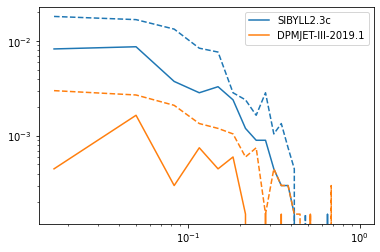

In [16]:
l=plt.plot(grid, d0_sib/widths, ls='--')[0]
plt.plot(grid, dpm_sib/widths,c=l.get_color(),label='SIBYLL2.3c')
l=plt.plot(grid, d0_dpm/widths, ls='--')[0]
plt.plot(grid, dpm_dpm/widths,c=l.get_color(),label='DPMJET-III-2019.1')
# l=plt.plot(grid, urq_pions/widths)[0]
# plt.plot(grid, sib_pions/widths,c=l.get_color(), ls='--',label='SIBYLL2.3c')
# plt.ylim(1e-2,)
plt.loglog()
plt.legend()